# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api

# Incorporated citipy to determine city based on latitude and longitude
# from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
from citipy import citipy
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities)

268

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# config information
weather_api = ''
url = 'http://api.openweathermap.org/data/2.5/weather?' 
units = 'imperial'


# Build partial query URL
query_url = url + "appid=" + weather_api + "&units=" + units + "&q="
query_url

In [5]:
# set up lists to hold reponse info
city_name = []
lat = []
temp = []
humidity = []
clouds = []
wind = []
lng = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("------------------------")
x=0
for city in cities:
    try:
        city_data = requests.get(query_url + city).json()
        x=x+1
        print(f"Processing Record {x} | {city}")
        
        #assign temp vars
        cn = city_data['name']
        cty = city_data['sys']['country']
        ltd = city_data['coord']['lat']
        lgt = city_data['coord']['lon']
        temperature = city_data['main']['temp_max']
        humid = city_data['main']['humidity']
        cloud = city_data['clouds']['all']
        winds = city_data['wind']['speed']
        dates = city_data['dt']
        
        #append list after possible key errors finish
        city_name.append(cn)
        country.append(cty)
        lat.append(ltd)
        lng.append(lgt)
        temp.append(temperature)
        humidity.append(humid)
        clouds.append(cloud)
        wind.append(winds)
        date.append(dates)
       
    except KeyError:
        print("city name not found")
       
        
print("----------------------")
print("data retrieval complete")

Beginning Data Retrieval
------------------------
Processing Record 1 | cape town
Processing Record 2 | west lake stevens
Processing Record 3 | saint-leu
Processing Record 4 | punta arenas
Processing Record 5 | yellowknife
Processing Record 6 | port alfred
Processing Record 7 | puerto ayora
Processing Record 8 | bundaberg
Processing Record 9 | barrow
Processing Record 10 | marsh harbour
Processing Record 11 | barentsburg
city name not found
Processing Record 12 | olafsvik
Processing Record 13 | ushuaia
Processing Record 14 | amderma
city name not found
Processing Record 15 | oranjemund
Processing Record 16 | bethel
Processing Record 17 | rikitea
Processing Record 18 | port blair
Processing Record 19 | korla
Processing Record 20 | tripoli
Processing Record 21 | harper
Processing Record 22 | bereda
Processing Record 23 | hermanus
Processing Record 24 | pevek
Processing Record 25 | east london
Processing Record 26 | mar del plata
Processing Record 27 | krasnaya gorka
Processing Record 28 

Processing Record 233 | dingle
Processing Record 234 | tuatapere
Processing Record 235 | avarua
Processing Record 236 | gorin
Processing Record 237 | vera cruz
Processing Record 238 | aksarka
Processing Record 239 | kodinar
Processing Record 240 | araouane
Processing Record 241 | torbay
Processing Record 242 | matagami
Processing Record 243 | praia da vitoria
Processing Record 244 | shitanjing
Processing Record 245 | iranshahr
Processing Record 246 | phan rang
city name not found
Processing Record 247 | vila
Processing Record 248 | manubul
Processing Record 249 | panukulan
Processing Record 250 | taoudenni
Processing Record 251 | puerto ayacucho
Processing Record 252 | westport
Processing Record 253 | yar-sale
Processing Record 254 | lasa
Processing Record 255 | nyurba
Processing Record 256 | camacha
Processing Record 257 | pionerskiy
Processing Record 258 | tasiilaq
Processing Record 259 | vanimo
Processing Record 260 | dinga
Processing Record 261 | seabra
Processing Record 262 | sao 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a data frame with city and respective data points
df = pd.DataFrame({
    'City': city_name,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': temp,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind Speed': wind,
    'Country': country,
    'Date': date
})

df

df.to_csv(r'starter_code\city_data.csv')

In [7]:
# describe data set with mean, median, min, max, etc 
df.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,2.420000e+02
mean,19.705909,14.227273,57.635124,71.578512,48.702479,8.048554,1.603920e+09
std,35.023637,92.380651,22.123463,21.991983,39.804532,5.489653,6.179829e+01
min,-54.800000,-175.200000,-4.650000,13.000000,0.000000,0.310000,1.603919e+09
25%,-10.742500,-58.445000,42.367500,61.000000,1.000000,3.767500,1.603920e+09
50%,26.635000,17.185000,60.800000,77.000000,47.500000,6.930000,1.603920e+09
75%,49.735000,84.482500,76.945000,87.000000,90.000000,10.940000,1.603920e+09
max,78.220000,179.320000,93.520000,100.000000,100.000000,28.860000,1.603920e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
df2 = df.loc[df['Humidity'] > 100]
df2

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

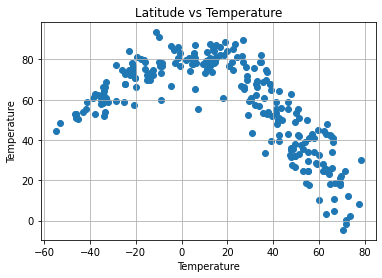

In [9]:
# Establishing data in a scatter plot
plt.scatter(df['Lat'], df['Max Temp'])

# Incorporate the other graph properties
plt.title('Latitude vs Temperature')
plt.ylabel('Temperature')
plt.xlabel('Temperature')
plt.grid(True)

# Show plot
plt.show()

#The closer to the equater the higher the temperature. 

## Latitude vs. Humidity Plot

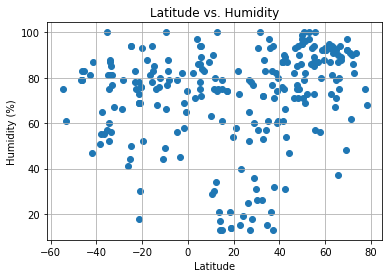

In [10]:
# Establishing data in a scatter plot
plt.scatter(df['Lat'], df['Humidity'])

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Show plot
plt.show()

#Lowest humidity % was in the 15-40 degree latitude. Everything else was between 40-100%

## Latitude vs. Cloudiness Plot

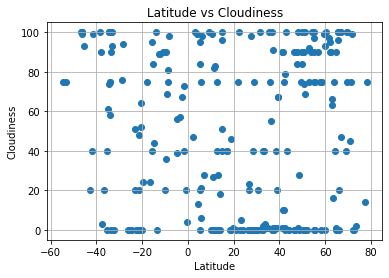

In [11]:
# Establishing data in a scatter plot
plt.scatter(df['Lat'], df['Cloudiness'])

# Incorporate the other graph properties
plt.title('Latitude vs Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(True)

# Show plot
plt.show()

#No consistency with latitude leading to cloudiness. 

## Latitude vs. Wind Speed Plot

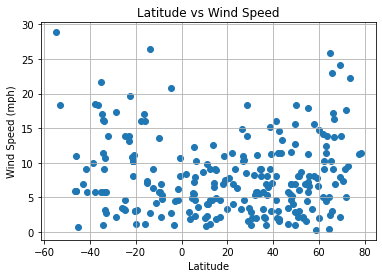

In [12]:
# Establishing data in a scatter plot
plt.scatter(df['Lat'], df['Wind Speed'])

# Incorporate the other graph properties
plt.title('Latitude vs Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Show plot
plt.show()

#General recorded windspeed tends to be 15mph or less.

## Linear Regression

In [13]:
northern = df.loc[df["Lat"] >= 0,:]

southern = df.loc[df["Lat"] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7812304858396095


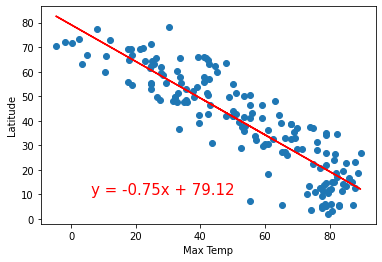

In [14]:
# Print out the r-squared value along with the plot.
x_values = northern['Max Temp']
y_values = northern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#Temperatures are highest at the lowest latitude

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6858594037728215


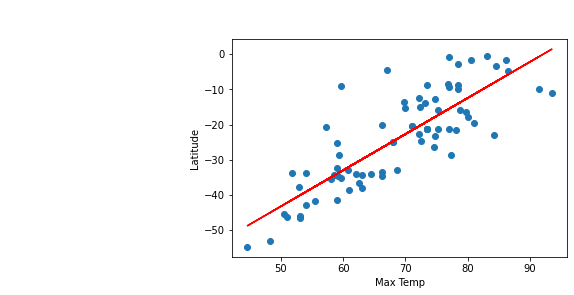

In [15]:
# Print out the r-squared value along with the plot.
x_values = southern['Max Temp']
y_values = southern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#Temperatures are highest at the lowest latitude

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11769818228457551


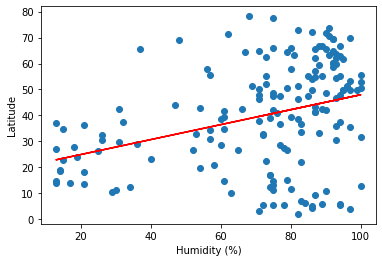

In [16]:
# Print out the r-squared value along with the plot.
x_values = northern['Humidity']
y_values = northern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#Higher rates of humidity appear for all latitudes while lower latitudes have more points of lower humidity. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0007417143549114459


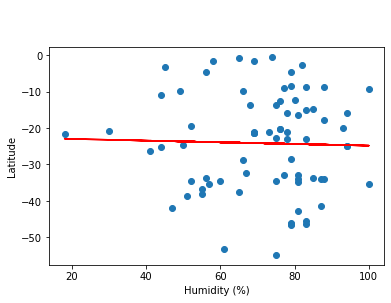

In [17]:
# Print out the r-squared value along with the plot.
x_values = southern['Humidity']
y_values = southern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#All of the latitudes have a similar range of humidity %

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03885117934222359


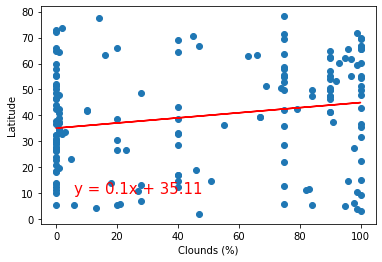

In [18]:
# Print out the r-squared value along with the plot.
x_values = northern['Cloudiness']
y_values = northern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Clounds (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#Cloudiness % appear mostly on the extremes of 0 or 100.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.037602648767633765


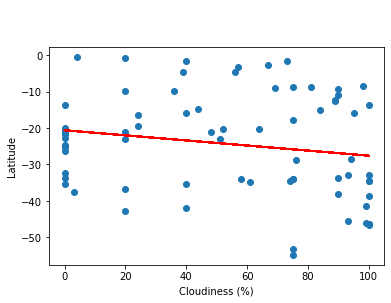

In [19]:
# Print out the r-squared value along with the plot.
x_values = southern['Cloudiness']
y_values = southern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#No real trend with cloudniess %

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08535210490049314


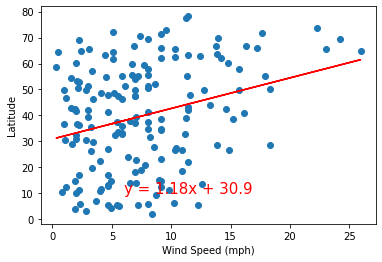

In [20]:
# Print out the r-squared value along with the plot.
x_values = northern['Wind Speed']
y_values = northern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#General wind speed is under 15 mph for all latitudes.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04583914815526412


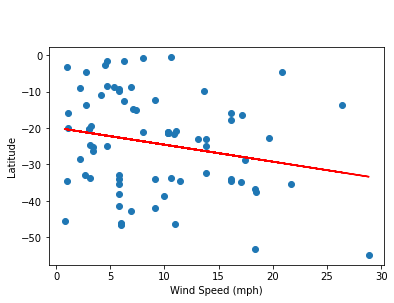

In [21]:
# Print out the r-squared value along with the plot.
x_values = southern['Wind Speed']
y_values = southern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#Genearl wind speeds is under 15 mph for all latitudes. 